<h1><center>Random Forest</center></h1>



**Réalisé par:**
- AKHADAM Ayoub

 24/12/2021

## Chargement des packages nécessaires

In [1]:
#install.packages("randomForest")

In [15]:
library(tidyverse)
library(caret)
library(randomForest)
library(ggplot2)
library(cowplot)

### Jeu de données

Cet ensemble de données  se compose de quatre bases de données : Cleveland, Hongrie, Suisse et Long Beach V. Le champ "cible" fait référence à la présence d'une maladie cardiaque chez le patient. Il a une valeur entière de 0 = pas de maladie et de 1 = maladie.
    
Les données comportent 303 observations et 14 variables. Chaque observation contient les informations suivantes sur un individu.

- age: Age de l'individu en années.


- sex: Sexe de l'individu(1 = homme ; 0 = femme)


- cp: Type de douleur thoracique (1 = angine typique ; 2 = angine atypique ; 3 = douleur non angineuse ; 4 = asymptomatique)


- trestbps: Tension artérielle au repos (en mm Hg à l'admission à l'hôpital)


- chol: Cholestérol sérique en mg/dl


- fbs: Glycémie à jeun > 120 mg/dl (1 = vrai ; 0 = faux)


- restecg: Résultats électrocardiographiques au repos (0 = normal ; 1 = présentant un ST-T ; 2 = hypertrophie)


- thalach: Fréquence cardiaque maximale atteinte


- exang: Angine de poitrine induite par l'exercice (1 = oui ; 0 = non)


- oldpeak: Dépression ST induite par l'exercice par rapport au repos


- slope: La pente du segment ST de pointe à l'effort (1 = pente ascendante ; 2 = pente plate ; 3 = pente descendante)


- ca: Nombre de vaisseaux principaux (0-4) colorés par la flourosopie


- thal: La thalassémie est un trouble sanguin héréditaire qui affecte la capacité de l'organisme à produire de l'hémoglobine et des globules rouges. 1 = normal ; 2 = défaut fixe ; 3 = défaut réversible


- target: l'attribut prédit - diagnostic de maladie cardiaque (statut de la maladie angiographique) (Valeur 0 = < 50% de rétrécissement du diamètre ; Valeur 1 = > 50% de rétrécissement du diamètre)
    

## Objectif

L'objectif est de prédire si une personne donnée est atteinte d'une maladie cardiaque ou non en utilisant RandomForest.

In [3]:
data = read.csv('data_heart.csv')

In [4]:
head(data)

,ï..age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>
1,63,M,3,145,233,1,0,150,0,2.3,0,1,2,Unhealthy
2,37,M,2,130,250,0,1,187,0,3.5,0,1,3,Unhealthy
3,41,F,1,130,204,0,0,172,0,1.4,2,1,3,Unhealthy
4,56,M,1,120,236,0,1,178,0,0.8,2,1,3,Unhealthy
5,57,F,0,120,354,0,1,163,1,0.6,2,1,3,Unhealthy
6,57,M,0,140,192,0,1,148,0,0.4,1,1,2,Unhealthy


In [5]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ ï..age  : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : chr  "M" "M" "F" "M" ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ thal    : int  2 3 3 3 3 2 3 4 4 3 ...
 $ target  : chr  "Unhealthy" "Unhealthy" "Unhealthy" "Unhealthy" ...


In [6]:
data$sex <- as.factor(data$sex)
data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)
data$ca <- as.factor(data$ca)  
data$thal <- as.factor(data$thal)
data$target <- as.factor(data$target)

In [7]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ ï..age  : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : Factor w/ 2 levels "F","M": 2 2 1 2 1 2 1 2 2 2 ...
 $ cp      : Factor w/ 4 levels "0","1","2","3": 4 3 2 2 1 1 2 2 3 3 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 2 1 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 1 2 1 2 2 2 1 2 2 2 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : Factor w/ 3 levels "0","1","2": 1 1 3 3 3 2 2 3 3 3 ...
 $ ca      : Factor w/ 5 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ thal    : Factor w/ 4 levels "1","2","3","4": 2 3 3 3 3 2 3 4 4 3 ...
 $ target  : Factor w/ 2 levels "Healthy","Unhealthy": 2 2 2 2 2 2 2 2 2 2 ...


- Nous somme dans le cas de classification , et on a 13 variables explicatives donc par défaut, randomForest() va définir mtry = sqrt(13) = 3.6 ≈ 3


- Random forest aussi génère 500 arbres par défaut.

In [8]:
model <- randomForest(target ~ ., data=data, proximity=TRUE)

In [9]:
model


Call:
 randomForest(formula = target ~ ., data = data, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 16.83%
Confusion matrix:
          Healthy Unhealthy class.error
Healthy       110        28   0.2028986
Unhealthy      23       142   0.1393939

Le model nous donne :
- Le taux d'erreur OOB(16.83%) pour la forêt avec ntree(=500 par défaut) arbres. 
- La matrice de confusion pour la forêt avec des arbres ntree.

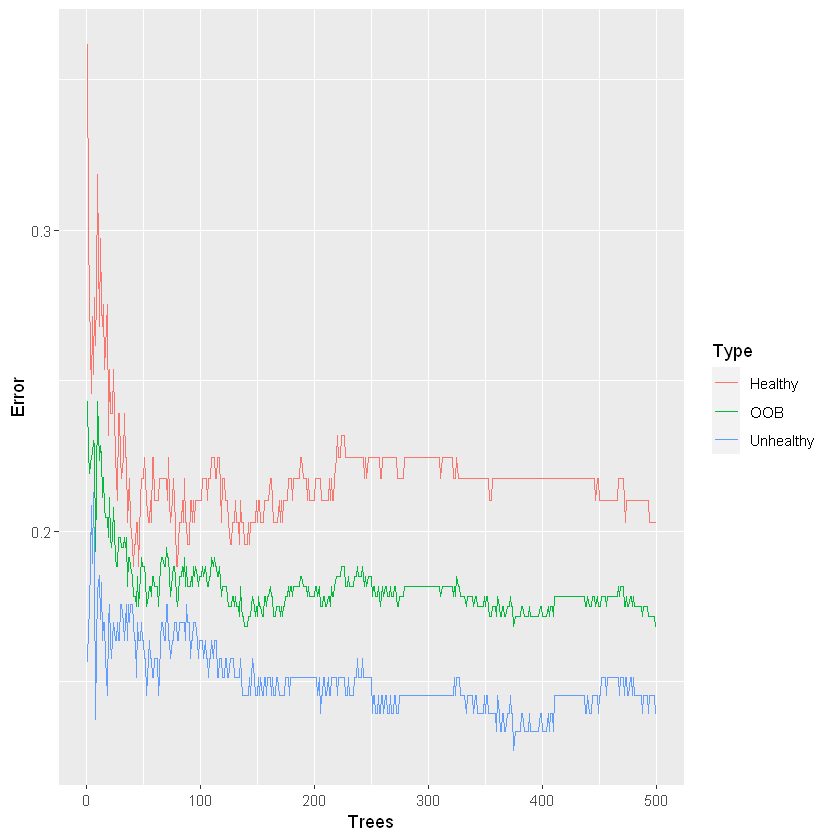

In [10]:
oob.error.data <- data.frame(
  Trees=rep(1:nrow(model$err.rate), times=3),
  Type=rep(c("OOB", "Healthy", "Unhealthy"), each=nrow(model$err.rate)),
  Error=c(model$err.rate[,"OOB"], 
    model$err.rate[,"Healthy"], 
    model$err.rate[,"Unhealthy"]))

ggplot(data=oob.error.data, aes(x=Trees, y=Error)) +
  geom_line(aes(color=Type))

- Blue: montre le taux d'erreur lors de la classification des patients ayant des maladies cardiaques.


- Rouge: montre le taux d'erreur lors de la classification des patients n'ayant pas des maladies cardiaques.


- Vert: Le taux d'erreur global pour les patients OOB.

>En général, on voit que le taux d'erreur diminue lorsque notre modèle a plus d'arbres.


> Pour cela on va essayer d'ajouter plus d'arbres pour vérifier si l'error continuera a diminuer ou non.

## Amélioration de la prédiction de Random Forest 

### Choix du ntree 
On entraine notre modèle avec 1000 arbres pour vérifier si l'error continuera a diminuer ou non.

In [16]:
model <- randomForest(target ~ ., data=data, ntree=1000, proximity=TRUE)
model


Call:
 randomForest(formula = target ~ ., data = data, ntree = 1000,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 16.83%
Confusion matrix:
          Healthy Unhealthy class.error
Healthy       109        29   0.2101449
Unhealthy      22       143   0.1333333

Après avoir construit random forest avec 1000 arbres, nous obtenons un erreur OOB reste égale 16,17 % .

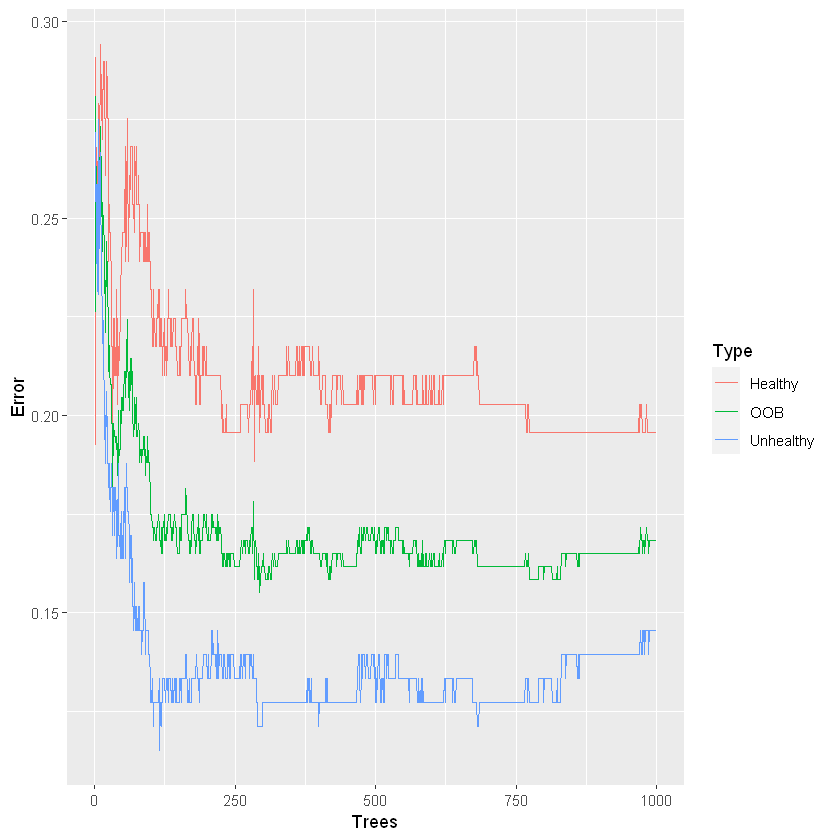

In [12]:
oob.error.data <- data.frame(
  Trees=rep(1:nrow(model$err.rate), times=3),
  Type=rep(c("OOB", "Healthy", "Unhealthy"), each=nrow(model$err.rate)),
  Error=c(model$err.rate[,"OOB"], 
    model$err.rate[,"Healthy"], 
    model$err.rate[,"Unhealthy"]))

ggplot(data=oob.error.data, aes(x=Trees, y=Error)) +
  geom_line(aes(color=Type))

### Choix de mtry

mtry = 3  OOB error = 0% 
Searching left ...
Searching right ...
      mtry OOBError
3.OOB    3        0


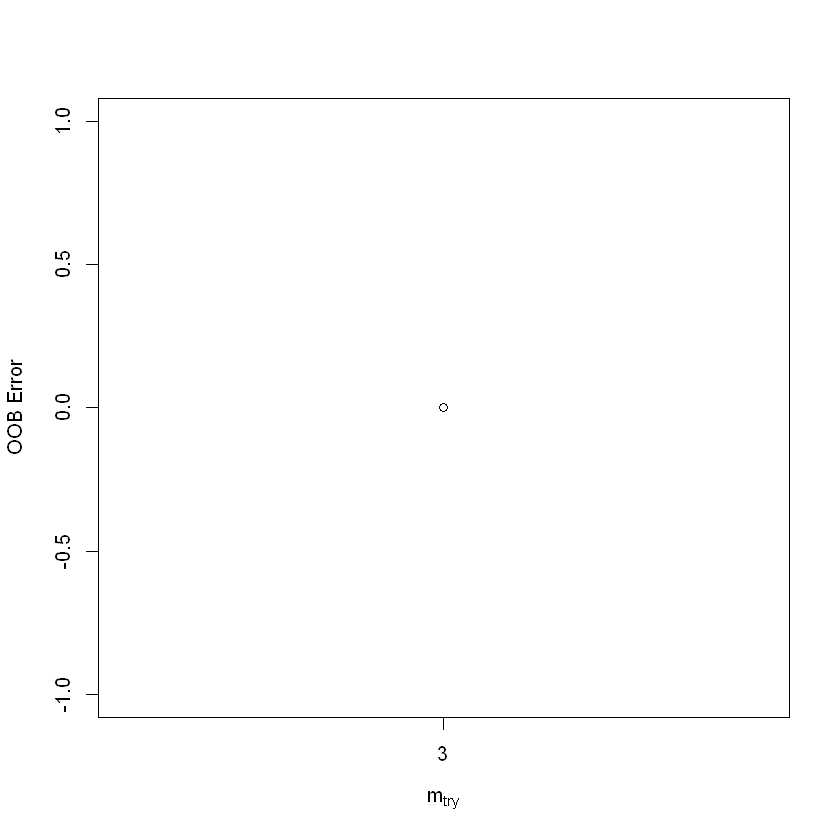

In [13]:
bestmtry <- tuneRF(data,data$target,stepFactor = 1.2,improve = 0.01,trace= T ,plot =T)
print(bestmtry)

### Les variables importantes

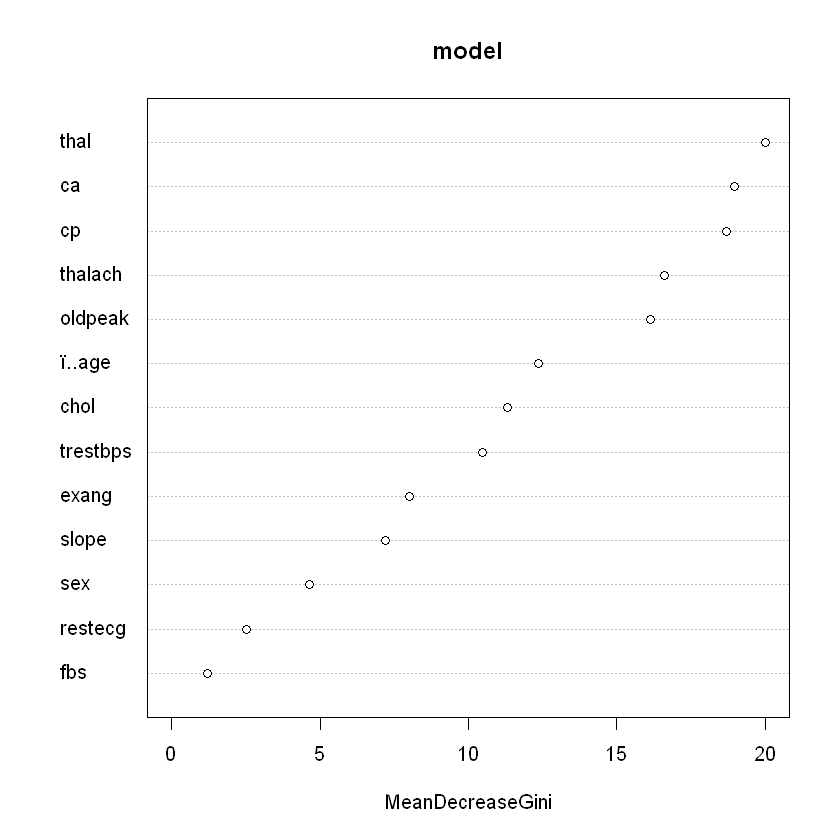

In [14]:
varImpPlot(model)